# Customer Segmentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram

# Introduction to Clustering

Clustering is the task of dividing the unlabeled data or data points into different clusters such that similar data points fall  \
in the same cluster than those which differ from the others. In simple words, the aim of the clustering process is to segregate groups with similar traits and assign them into clusters.

<img src="https://i.stack.imgur.com/cIDB3.png">

## Importing the Dataset

In [2]:
data = pd.read_csv('../input/customer-clustering/segmentation data.csv')

In [3]:
data.shape

(2000, 8)

In [4]:
data.drop(['ID'], inplace=True, axis=1)

In [5]:
data.head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
5,0,0,35,1,144848,0,0
6,0,0,53,1,156495,1,1
7,0,0,35,1,193621,2,1
8,0,1,61,2,151591,0,0
9,0,1,28,1,174646,2,0


In [6]:
data.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [7]:
data.isna().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

## Exploratory Data Analysis

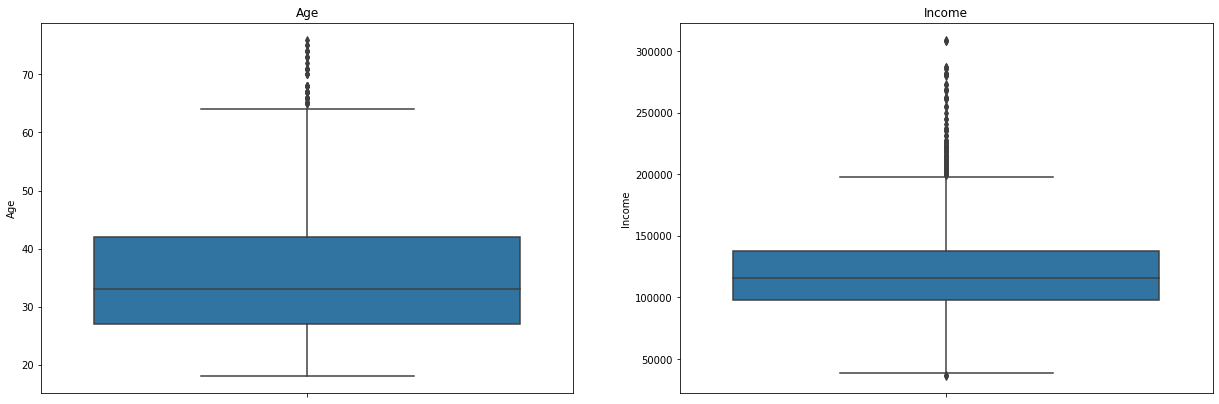

In [8]:
plt.figure(figsize=(21,15))

plt.subplot2grid((2,2), (0,0))
box1 = sns.boxplot(y=data.Age)
plt.title("Age")

plt.subplot2grid((2,2), (0,1))
box2 = sns.boxplot(y=data.Income)
plt.title("Income")

plt.show()

In [9]:
data.Age.describe()

count    2000.000000
mean       35.909000
std        11.719402
min        18.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        76.000000
Name: Age, dtype: float64

In [10]:
data.Income.describe()

count      2000.000000
mean     120954.419000
std       38108.824679
min       35832.000000
25%       97663.250000
50%      115548.500000
75%      138072.250000
max      309364.000000
Name: Income, dtype: float64

### Inferences
- Mean age is approximately 36 years. Max is 76 meanwhile Min is 18.
- Mean income is 121k. Max is 310k meanwhile Min is 36k.

### Proportion of data values in each feature

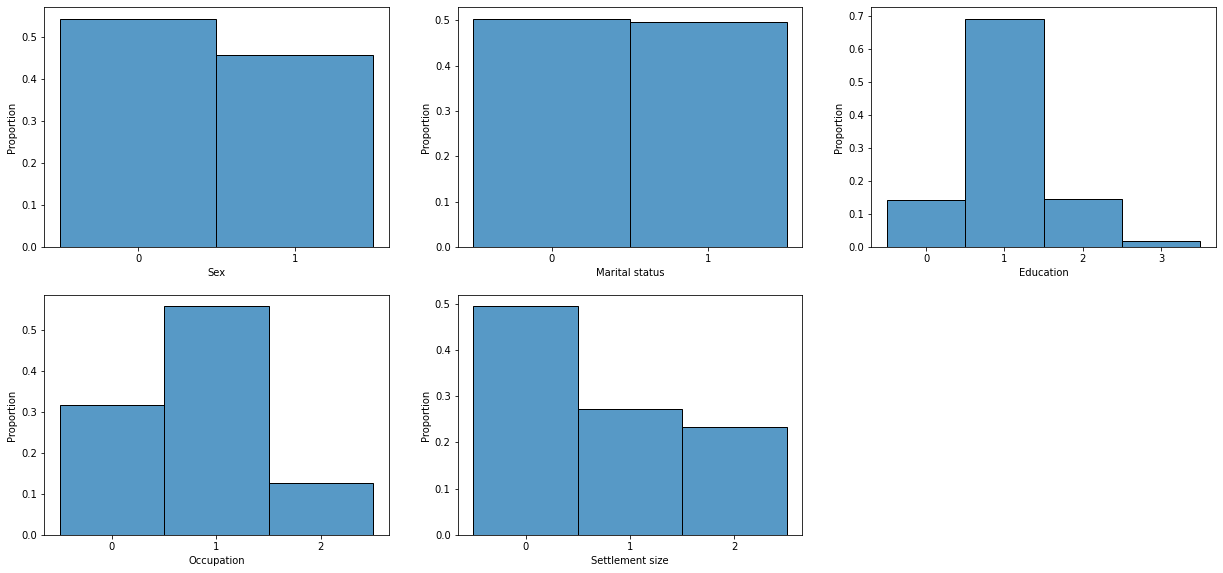

In [11]:
plt.figure(figsize=(21,15))

plt.subplot2grid((3,3), (0,0))
sns.histplot(data.Sex.astype(str), stat='proportion')

plt.subplot2grid((3,3), (0,1))
sns.histplot(data['Marital status'].astype(str), stat='proportion')

plt.subplot2grid((3,3), (0,2))
sns.histplot(data.Education.astype(str).sort_values(), stat='proportion')

plt.subplot2grid((3,3), (1,0))
sns.histplot(data.Occupation.astype(str).sort_values(), stat='proportion')

plt.subplot2grid((3,3), (1,1))
sns.histplot(data['Settlement size'].astype(str).sort_values(), stat='proportion')

plt.show()

# Standardizing the Data

In [12]:
ss = StandardScaler()
data = pd.DataFrame(ss.fit_transform(data))

# K Means Model

K-means clustering is a popular unsupervised machine learning algorithm used to group data points with similar characteristics into K number of clusters. It works by first randomly assigning K number of centroids to the data points, and then iteratively adjusting the centroids to minimize the sum of squared distances between the data points and their assigned centroid. This process continues until convergence or until a maximum number of iterations is reached.

<img src="https://av-eks-blogoptimized.s3.amazonaws.com/40672tb2.png">

## Determining number of clusters : Elbow Method

The elbow method is a technique used to determine the optimal number of clusters in a dataset for k-means clustering. The method works by plotting the Within Cluster Sum of Squares (WCSS) between each data point and its assigned centroid for different values of K.

As K increases, the WCSS tends to decrease, since with more clusters, each data point is likely to be closer to its assigned centroid. However, beyond a certain point, the improvement in SSE becomes less significant, and the plot of WCSS versus K starts to form an elbow shape. For this, we will train multiple K means model with clusters ranging from 1-10.

In [13]:
wcss = {'wcss_score':[], 'no_of_clusters':[]}
for i in range(1,11):
    kmeans = KMeans(i, random_state=0)
    kmeans.fit(data)
    wcss['wcss_score'].append(kmeans.inertia_)
    wcss['no_of_clusters'].append(i)
wcss_df = pd.DataFrame(wcss)

In [14]:
wcss_df.head(10)

,wcss_score,no_of_clusters
0,14000.000000,1
1,10514.347126,2
2,8631.672548,3
3,7169.870822,4
4,6403.082701,5
5,5881.453398,6
6,5369.717653,7
7,4984.469020,8
8,4688.677803,9
9,4349.546981,10


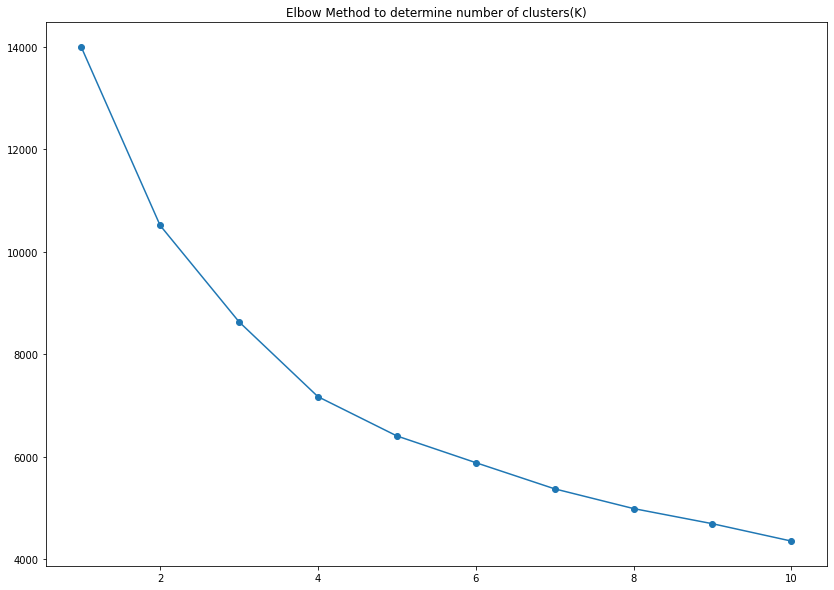

In [15]:
plt.figure(figsize=(14,10))
plt.plot(wcss_df.no_of_clusters, wcss_df.wcss_score, marker='o')
plt.title("Elbow Method to determine number of clusters(K)")
plt.show()

### Inference
At 4 clusters, we can see that the decrease in WCSS starts declining. Therefore, the number of clusters within this dataset is **4**
* K = 4

In [16]:
kmeans_final = KMeans(n_clusters=4, random_state=0, init='k-means++')
classlabels = kmeans_final.fit_predict(data)

In [17]:
data['classlabels'] = classlabels
data.classlabels = data.classlabels.astype(str)
data = data.sort_values('classlabels')

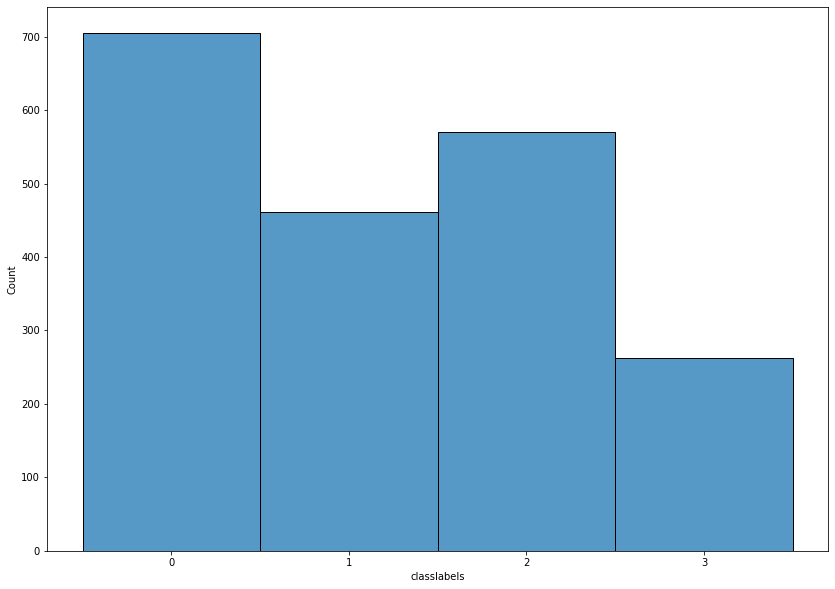

In [18]:
plt.figure(figsize=(14,10))
sns.histplot(data.classlabels)
plt.show()

# Evaluating our Model : Silhouette Score

The silhouette score is a metric used to evaluate the quality of clustering in a dataset. \
It measures how similar a data point is to its own cluster compared to other clusters.

The silhouette score ranges from -1 to 1, with a higher score indicating better clustering performance. \
A score of 1 indicates that a data point is very similar to its own cluster and very dissimilar to other clusters, while a score of -1 indicates the opposite.

To calculate the silhouette score for a cluster, the average distance between a data point and all other points in the same cluster is first computed. \
The average distance between the data point and all points in the nearest neighboring cluster is then calculated. The silhouette score for the data point is then given by the difference between these two values, divided by the maximum of the two.

In [19]:
score = silhouette_score(data, kmeans_final.labels_, random_state=0)
print(f"Silhouette score: {score:0.3f} ~ 0")

Silhouette score: -0.058 ~ 0


Silhouette score of 0 means our model did not work very well. The worse could be -1, but the best can go upto 1.

# Hierarchical clustering - Agglomerative

Hierarchical clustering groups similar objects into a dendrogram. It merges similar clusters iteratively, starting with each data point as a separate cluster.  \
This creates a tree-like structure that shows the relationships between clusters and their hierarchy.

The dendrogram from hierarchical clustering reveals the hierarchy of clusters at different levels, highlighting natural groupings in the data.  \
It provides a visual representation of the relationships between clusters, helping to identify patterns and outliers, making it a useful tool for exploratory data analysis. For example:

Let’s say we have the below points and we want to cluster them into groups:  \
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-13-10-32.png" alt="">

We can assign each of these points to a separate cluster:   \
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-13-11-28.png" alt="">

Now, based on the similarity of these clusters, we can combine the most similar clusters together and repeat this process until only a single cluster is left:   \
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-13-12-35.png" alt="">

We are essentially building a hierarchy of clusters. That’s why this algorithm is called hierarchical clustering. This type of Hierarchical clustering is called **Agglomerative hierarchical clustering**. \
We assign each point to an individual cluster in this technique. Then, at each iteration, we merge the closest pair of clusters and repeat this step until only a single cluster is left:   \
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/Screenshot-from-2019-05-15-13-31-06.png" alt="">

To improve the clustering model, we move to hierarchical clustering

In [20]:
new_data = data.drop(['classlabels'], axis=1)

### Distances and Linkages

Distances and linkages are two key components of hierarchical clustering
* **Distances**: Distances refer to the measure of dissimilarity or similarity between two data points in a dataset.
* **Linkages**: Linkages refer to the method used to compute the distance between clusters during the clustering process.

With multiple computation options for both distance and linkage in clusters, we calculate the silhouette score for all permutations

In [21]:
## function to compute scores for all permutations
def s_score(distance, linkage):
    agc = AgglomerativeClustering(n_clusters=4, affinity=distance, linkage=linkage)
    agc.fit_predict(new_data)
    score = silhouette_score(new_data, agc.labels_, random_state=0)
    return score

In [22]:
distances = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
linkages = ['ward', 'complete', 'average', 'single']

In [23]:
scoring = {'dist':[], 'link':[], 'sScore':[]}
for i in distances:
    for j in linkages:
        try:
            score = s_score(i, j)
            scoring['dist'].append(i)
            scoring['link'].append(j)
            scoring['sScore'].append(score)
        except:
            scoring['dist'].append(i)
            scoring['link'].append(j)
            scoring['sScore'].append(np.nan)
scoringDf = pd.DataFrame(scoring)


**NOTE**: We put this process in try-except block since 'ward' only works with 'euclidean' distance. We can now find the best permutation.

In [24]:
scoringDf.dropna(axis=0, inplace=True)

In [25]:
final_result = scoringDf[scoringDf['sScore'] == max(scoringDf['sScore'])]
final_result

,dist,link,sScore
18,cosine,average,0.259621


# DBScan Clustering

**DBSCAN** stands for **D**ensity-**B**ased **S**patial **C**lustering of **A**pplications with **N**oise.

It groups ‘densely grouped’ data points into a single cluster. It can identify clusters in large spatial datasets by looking at the local density of the data points.  \
The most exciting feature of DBSCAN clustering is that it is robust to outliers. It also does not require the number of clusters to be told beforehand, unlike K-Means, where we have to specify the number of centroids.

DBSCAN requires only two parameters: epsilon and minPoints. Epsilon is the radius of the circle to be created around each data point to check the density \
and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/db26.png" alt=""> <br>

#### This is what it looks like:  

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/db12.png" alt=""> <br>

In [26]:
dbs = DBSCAN(eps=2, min_samples=10)
dbs.fit_predict(new_data)
score = silhouette_score(new_data, dbs.labels_, random_state=0)
print(f"Silhouette score: {score:0.3f}")

Silhouette score: 0.179
